# Built in meshes

FEniCS provides built-in capabilities to generate various types of meshes, allowing users to focus on the core of their simulations. Please visit the official documentation link provided to learn how to modify the mesh. After familiarizing yourself with the process, return here to implement the changes and visualize the updated results.

https://fenicsproject.org/olddocs/dolfin/latest/python/demos/built-in-meshes/demo_built-in-meshes.py.html

In [1]:
from dolfin import *

**Change this portion of the code to:**
1. Make a 2D unit square mesh.
2. Make a rectangle mesh with dimension $2 \times 1$

In [2]:
mesh1 = IntervalMesh(30, 0, 1)
mesh2 = UnitSquareMesh(30, 30)
mesh3 = mesh = RectangleMesh(Point(0, 0), Point(2, 1), 30, 15)

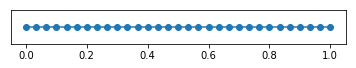

In [6]:
plot(mesh1)

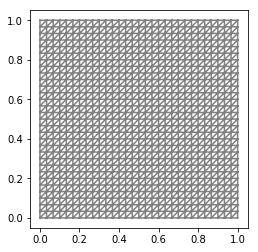

In [7]:
plot(mesh2)

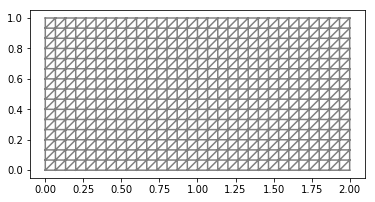

In [8]:
plot(mesh3)

In [10]:
import numpy as np

In [11]:
U = FunctionSpace(mesh, "CG", 1)

u_D = Constant(0.0)
boundary = CompiledSubDomain("on_boundary")
bc = DirichletBC(U, u_D, boundary)
u, v = TrialFunction(U), TestFunction(U)

a = inner(grad(u), grad(v)) * dx
f_expr = Expression("pi*pi*sin(pi*x[0])", pi=np.pi, degree=2)
L = f_expr * v * dx

u_sol = Function(U, name = "field")
solve(a == L, u_sol, bc)

with XDMFFile("output/result.xdmf") as outfile:
    outfile.write(u_sol)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
